In [1]:
no_subjects = 35
ages = np.zeros(no_subjects)
numbers = [f"{i:02}" for i in range(1, no_subjects+1)]#
target = np.zeros((no_subjects,2,no_blocks))
for si in  numbers:
    II = [0,1,2,3,4,5,6,7,8]
    ages[int(si)-1] = subjects[0,int(si)-1]['visite_V0'][0,0]['Age'][0,0]
    #for block in range(1,no_blocks+1):#no_blocks+1):
    for ii in II : 
        target[int(si)-1,:,ii] =  subject[int(si)-1]['Cond']['SDLP'][ii]#[:]
    II = [9,10,11]
    #for block in range(10,13):#no_blocks+1):
        # Set the montage to your raw/epochs object
    for ii in II : 
        target[int(si)-1,:,ii] =  subject[int(si)-1]['Cond']['SDLP'][ii]#[:]

NameError: name 'np' is not defined

In [ ]:
import pickle
no_subjects = 35
# Load the variables from the pickle file
with open("Cond_35_12b_adap_mine2.pkl", "rb") as file:#open("Cond_35_12b_nonadp.pkl","rb") as file:#
#with open("Cond_35_12b_nonadp.pkl", "rb") as file:
    powers_c, powers_o, center_gravity_c, center_gravity_o, target = pickle.load(file)


In [118]:
II =[3,4,5]
medians_c = np.median(powers_c,axis=(2))#(1,2))#median
median_c_g_c = np.median(center_gravity_c,axis=(2))
median_c_g_o = np.median(center_gravity_o,axis=(2))
medians_o = np.median(powers_o,axis=(2))#(1,2))
diff = np.concatenate((medians_c,medians_o,medians_c-medians_o), axis=2) 
DDFS = [26,25,36,25,33,26,32,28,40,28,25,22,26,25,23,27,33,44,60,23,44,17,39,49,41]


In [119]:
import pickle

# Load the variables from the pickle file
with open("Cond_35_12b_adap_mine2.pkl", "rb") as file:
    powers_c, powers_o, center_gravity_c, center_gravity_o, targets= pickle.load(file)

II =[3,4,5]
medians_c = np.median(powers_c,axis=(2))#(1,2))#median
median_c_g_c = np.median(center_gravity_c,axis=(2))
median_c_g_o = np.median(center_gravity_o,axis=(2))
medians_o = np.median(powers_o,axis=(2))#(1,2))
diff = np.concatenate((medians_c,medians_o,medians_c-medians_o), axis=2) 
DDFS = [26,25,36,25,33,26,32,28,40,28,25,22,26,25,23,27,33,44,60,23,44,17,39,49,41]


#no_sbjects = 31
import matplotlib.pyplot as plt
no_blocks = 12
no_channels = 3
rej_no = 0
II = [4,13,36]
prc = 1


sbj_id = np.ones((no_subjects-rej_no)*no_blocks*prc)
sbj_blocks =  np.ones((no_subjects-rej_no)*no_blocks*prc)
block_time =  np.ones((no_subjects-rej_no)*no_blocks*prc)

for si in range(rej_no,no_subjects):
    sbj_id[(si-rej_no)*no_blocks*prc:(si-rej_no)*prc*no_blocks+no_blocks*prc]=si#
    sbj_blocks[(si-rej_no)*no_blocks*prc:(si-rej_no)*no_blocks*prc+no_blocks*prc]= np.repeat(np.arange(1, no_blocks + 1), prc)
    block_time[(si-rej_no)*no_blocks*prc:(si-rej_no)*no_blocks*prc+no_blocks*prc]= np.repeat(ages[si],prc)#[8.05,12.05,16.05,20.05, 00.05,4.05,20.05,00.05,4.05,8.05,12.05,16.05]
    
X = diff[rej_no*prc:,:,:].reshape(((no_subjects-rej_no)*prc*no_blocks,3*4*no_channels))# medians[:,1,II]- medians[:,0,II].reshape((no_subjects,2*no_channels))
#ddfs =  cat_DDFS[rej_no:,:]
#ddfs = ddfs.reshape((no_subjects-rej_no)*no_blocks)

#Subject 9 and 13 new values
target[8,:] = np.array([154.5337899,	157.8603336,	148.5623349,	153.6006809,	283.3165515,	326.2169195,	123.5740912,	140.1647044,	895.3080837,188.6211716,167.2686405,	199.4810817	])/10
target[12,:] = np.array([140.9569312,	144.5036967,	153.9935119,	146.8333177,	142.5171401,	153.5668623,	146.1177533,	135.1877086,	149.701896,175.9445015,176.0910196,	172.6305761])/10	
#NAN values
target[9,9] = 280.907242/10;
target[9,5] = 607.913013/10	
target[6,0]= 271.754541/10	
target[6,8]= 254.777298/10

target[11,1] = 179.802235/10
target[11,3] = 198.65912/10;
target[11,7] = 226.975496/10
target[4,3] =  287.913876/10;
target[4,7] =  333.41579/10;
target[4,8] =  378.425934/10


#For SE1
#target[8,:] = np.nan
#target[12,:] = np.nan

target[1,10] = np.nan
target[2,10] = np.nan
target[8,10] = np.nan
target[30,10] = np.nan

#SE2
#target[2,0] = np.nan;target[2,1]=np.nan;target[2,2]=np.nan;target[2,3]=np.nan;target[2,4]=np.nan;target[2,5]=np.nan;target[2,6]=np.nan; target[2,7]=np.nan;target[2,8]=np.nan

target[3,4] = np.nan; target[3,5] = np.nan; target[3,7]= np.nan; target[3,8] = np.nan
target[5,5] = np.nan; target[5,8]= np.nan
target[11,5] = np.nan
target[17,8] = np.nan

#exclude_indices = [12,30,21,14,26,33,29,6,10,17]#[2,8,10,13,21,29,32]#{12, 22, 21, 14, 26, 5,32,29,10,17}#[0,30,8,32,10,29,31,10,7,29,11,13,22,3,17,19,21]#{1,4,5,6,9,12,14,15,16,18,20,23,24,25,26,27,28,33,34}

# Set target[i, :] to np.nan for i in range(35) except the excluded indices
#target[np.array([i for i in range(35) if i not in exclude_indices]), :] = np.nan

I9  = [0,4,5,7,13,14,15,16,18,20,22,27,28,29,30,31,33,34]
I10 = [10,7,2,3,6,9,17,19,21,23,24,26]
I11 = [8,10,11,12,25,32]

target[3,:] = np.nan
target[22,:] = np.nan
for si in range(rej_no,no_subjects):
    if  ages[si]<30 or ages[si]>40:
        target[si,:] = np.nan
        
#for ii in range(no_subjects):
#    for jj in range(no_blocks):
#        if (alpha_peaks[ii,jj]<9.5) or (alpha_peaks[ii,jj]>10.5):
#            target[ii,jj] = np.nan

#target[4,:] = np.nan
#target[20,:] = np.nan
#target[28,:] = np.nan
#target[1,:] = np.nan
#target[2,:] = np.nan
#target[8,:] = np.nan

#target[13,:] = np.nan
#target[21,:] = np.nan
#target[26,:] = np.nan
#target[27,:] = np.nan
#target[29,:] = np.nan
#target[0,:] = np.nan
#target[4,:] = np.nan
#target[8,:]= np.nan
#for i in range(35):
#   for j in range(12):
#       if alpha_peaks[i,j]>10.2:
#           target[i,j] = np.nan

target = np.repeat(target, prc, axis=0)
y = target[rej_no*prc:,:]
#y[:,3:9] = np.nan

#y[:,0:3] = np.nan
#y[:,9:12] = np.nan
y = y.reshape((no_subjects-rej_no) * prc*no_blocks)
# Check which rows in the target data are not NaN
non_nan_indices =  ~np.isnan(y)#range(0,len(y))#


# Filter both X and y using those indices
input_data = X[non_nan_indices,:]
targets_tmp = y[non_nan_indices]
targets = y[non_nan_indices]
block_time = block_time[non_nan_indices]
print(target.shape)
print(targets.shape)
#ddfs = ddfs[non_nan_indices]
sbj_ids = sbj_id[non_nan_indices]
sbj_blocks = sbj_blocks[non_nan_indices]
#mind_wondering = mind_W[rej_no:,:].reshape((no_subjects-rej_no) * no_blocks)[non_nan_indices]
#rest_alphas = alphas[non_nan_indices]

center_g_c = median_c_g_c [rej_no*prc:,:,:].reshape((no_subjects-rej_no) * prc*no_blocks,no_channels)[non_nan_indices,:]
center_g_o = median_c_g_o[rej_no*prc:,:,:].reshape((no_subjects-rej_no) *prc* no_blocks,no_channels)[non_nan_indices,:]


low_threshold = 23#np.percentile((targets[~np.isnan(targets)]), 33)  #np.percentile(np.unique(targets[~np.isnan(targets)]), 33)  # 33rd percentile
mid_threshold = 24#np.percentile((targets[~np.isnan(targets)]), 66)  ##np.percentile(np.unique(targets[~np.isnan(targets)]), 66)  #66rd percentile

# Function to categorize the values
def categorize(value):
    
    if(np.isnan(value)):
        return np.nan
    else:
        if value <= low_threshold:
            return 0 # Low
        elif value <=  mid_threshold:
            return np.nan
        else:
            return 1
print(low_threshold)
print(mid_threshold)
# Apply the function to each value in the targets array
targets = np.array([categorize(val) for val in targets])
non_nan_indices = ~np.isnan(targets)## range(0,len(y))#

## Filter both X and y using those indices
input_data = input_data[non_nan_indices,:]
targets = targets[non_nan_indices]
targets_tmp = targets_tmp[non_nan_indices]
sbj_ids = sbj_ids[non_nan_indices]
sbj_blocks = sbj_blocks[non_nan_indices]
block_time = block_time[non_nan_indices]
#mind_wondering = mind_wondering[non_nan_indices]
#rest_alphas = rest_alphas[non_nan_indices]
#print(rest_alphas[:,0])
center_g_o = center_g_o[non_nan_indices,:]
center_g_c = center_g_c[non_nan_indices,:]
#ddfs = ddfs[non_nan_indices]

#non_nan_indices = np.where(center_g_c [:,0]<=12)[0]## range(0,len(y))#

## Filter both X and y using those indices
#input_data = input_data[non_nan_indices,:]
#targets = targets[non_nan_indices]
#targets_tmp = targets_tmp[non_nan_indices]
#sbj_ids = sbj_ids[non_nan_indices]
#sbj_blocks = sbj_blocks[non_nan_indices]

##mind_wondering = mind_wondering[non_nan_indices]
#rest_alphas = rest_alphas[non_nan_indices]
#print(rest_alphas[:,0])
#center_g_o = center_g_o[non_nan_indices,:]
#center_g_c = center_g_c[non_nan_indices,:]
print('-------------')
print(len(np.where(targets==0)[0]))
print(len(np.where(targets==1)[0]))
print(len(np.unique(sbj_ids)))

(35, 12)
(81,)
23
24
-------------
38
42
7


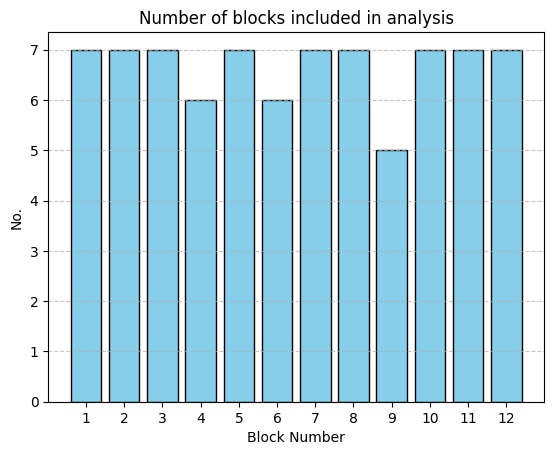

In [120]:
import matplotlib.pyplot as plt
import numpy as np



# Calculate the histogram
values, counts = np.unique(sbj_blocks, return_counts=True)

# Plot the histogram
plt.bar(values, counts, color='skyblue', edgecolor='black')
plt.title('Number of blocks included in analysis')
plt.xlabel('Block Number')
plt.ylabel('No.')
plt.xticks(values)  # Ensure all values from 1 to 9 are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [121]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

II = np.array([-1,0,3,6,9,12,15,18,21,27,30,33,36,39,42])+1#
# Assuming X is your feature matrix and y is your target vector
power_mind = input_data#np.concatenate((input_data,mind_wondering.reshape(len(mind_wondering),1)),axis=1)#mind_wondering

power_mind_g = np.concatenate((power_mind,center_g_c ), axis=1)
power_mind_g_oc = np.concatenate((power_mind_g,center_g_o ), axis=1)
power_mind_g_oc = np.concatenate((power_mind_g_oc,center_g_c-center_g_o), axis=1)
bt =  np.expand_dims(block_time, axis=1)
power_mind_g_oc = np.concatenate((power_mind_g_oc ,bt), axis=1)

cls=['Alpha,Cz,c','Alpha,Pz,c','Alpha,Fz,c','Beta,Cz,c','Beta,Pz,c','Beta,Fz,c','Theta,Cz,c','Theta,Pz,c','Theta,Fz,c','Delta,Cz,c','Delta,Pz,c','Delta,Fz,c','Alpha,Cz,o','Alpha,Pz,o','Alpha,Fz,o','Beta,Cz,o','Beta,Pz,o','Beta,Fz,o','Theta,Cz,o','Theta,Pz,o','Theta,Fz,o','Delta,Cz,o','Delta,Pz,o','Delta,Fz,o','dif_Alpha,Cz,c-o','dif_Alpha,Pz,c-o','dif_Alpha,Fz,c-o','dif_Beta,Cz,c-o','dif_Beta,Pz,c-o','dif_Beta,Fz,c-o','dif_Theta,Cz,c-o','dif-Theta,Pz,c-o','dif-Theta,Fz,c-o','dif-Delta,Cz,c-o','dif-Delta,Pz,c-o','dif-Delta,Fz,c-o','Freq_Grav_Cz_c','Freq_Grav_Pz_c','Freq_Grav_Fz_c','Freq_Grav_Cz_o','Freq_Grav_Pz_o','Freq_Grav_Fz_o','dif-Freq_Grav_Cz_c-o','Age','dif-Freq_Grav_Fz_c-o','Time']
X = pd.DataFrame(power_mind_g_oc[:,:44], columns=cls[:44])#[cls[i] for i in II])
X.iloc[:,43] = block_time
mi = mutual_info_classif(X, targets, random_state=0)

# Convert to a DataFrame for better interpretation
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


                 Feature  Mutual Information
43                   Age            0.476307
1             Alpha,Pz,c            0.286784
4              Beta,Pz,c            0.237870
17             Beta,Fz,o            0.222811
9             Delta,Cz,c            0.208648
18            Theta,Cz,o            0.206210
20            Theta,Fz,o            0.192087
6             Theta,Cz,c            0.183803
12            Alpha,Cz,o            0.181673
8             Theta,Fz,c            0.174132
30      dif_Theta,Cz,c-o            0.160357
14            Alpha,Fz,o            0.157549
15             Beta,Cz,o            0.144094
0             Alpha,Cz,c            0.142273
25      dif_Alpha,Pz,c-o            0.135461
13            Alpha,Pz,o            0.131390
5              Beta,Fz,c            0.130123
7             Theta,Pz,c            0.112531
21            Delta,Cz,o            0.108197
24      dif_Alpha,Cz,c-o            0.107125
28       dif_Beta,Pz,c-o            0.105140
19        

In [21]:
#Final kNN

from xgboost import XGBRegressor  # Assuming driving performance is continuous
from catboost import CatBoostClassifier,Pool
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import shap
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier

cm = np.zeros((2,2))


m = power_mind_g_oc[:,:].shape[0]#input_data.shape[0]
n = 1#input_data.shape[1]
p = power_mind_g_oc.shape[1]

acc = []
ytests = []
preds = []

# Initialize the XGBoost regressor (for regression tasks)

group_kfold = GroupKFold(n_splits=np.unique(sbj_ids[:]).shape[0]) # We have sleep parameters of 16 subjects

# List to store the root mean squared error for each fold
II =  range(24,36)# [36,37,38]#range(44)#[10,3,4,5,9,7,1,33]#43,10,4,9,7,36,1,37,31]# [9,10,11]# range(44)# range(44)#[43,38,11,1,9,36,5,19,40]#[43,9,33,10,0,12,14]#[0,1,2,3,4,5,6,7,8,9,10,11]#range(44)#[10,4,9,7,36,1,37,31]#[1,4,7,10,37]# [43,10,3,4,5,9,7,1,33]#range(44)#[43,10,3,4,5,9,7,1,33] #[43,10,3,4,5,9,7,1,33]#[43,10,3,4,5,9,7,36,1,37,33]#
data = power_mind_g_oc[:,II]#input_data[:,:]#.reshape(m*n,p)
re_targets = targets #np.repeat(targets,input_data.shape[1])
re_sbj_ids = sbj_ids#np.repeat(sbj_ids,input_data.shape[1])
n_match = 0; n_total = 0
i =1
preds=[]
all_test_blocks = []
y_tests=[]
feature_names =['Alpha,Cz,c','Alpha,Pz,c','Alpha,Fz,c','Beta,Cz,c','Beta,Pz,c','Beta,Fz,c','Theta,Cz,c','Theta,Pz,c','Theta,Fz,c','Delta,Cz,c','Delta,Pz,c','Delta,Fz,c','Alpha,Cz,o','Alpha,Pz,o','Alpha,Fz,o','Beta,Cz,o','Beta,Pz,o','Beta,Fz,o','Theta,Cz,o','Theta,Pz,o','Theta,Fz,o','Delta,Cz,o','Delta,Pz,o','Delta,Fz,o','dif_Alpha,Cz,c-o','dif_Alpha,Pz,c-o','dif_Alpha,Fz,c-o','dif_Beta,Cz,c-o','dif_Beta,Pz,c-o','dif_Beta,Fz,c-o','dif_Theta,Cz,c-o','dif-Theta,Pz,c-o','dif-Theta,Fz,c-o','dif-Delta,Cz,c-o','dif-Delta,Pz,c-o','dif-Delta,Fz,c-o','Freq_Grav_Cz_c','Freq_Grav_Pz_c','Freq_Grav_Fz_c','Freq_Grav_Cz_o','Freq_Grav_Pz_o','Freq_Grav_Fz_o','dif-Freq_Grav_Cz_c-o','Age','dif-Freq_Grav_Fz_c-o','Time']
feature_names = [feature_names[i] for i in II]
# Perform cross-validation manually
for train_index, test_index in group_kfold.split(data, re_targets, re_sbj_ids):
    print('test_sbj')
    print(sbj_ids[test_index])
    X_train, X_test =  data[train_index,:], data[test_index,:]
    y_train, y_test =  re_targets[train_index],  re_targets[test_index]
    test_blocks = sbj_blocks[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    train_sbjs = re_sbj_ids[train_index]
    test_blocks = sbj_blocks[test_index]
    
   # np.random.seed(42)
    
    rows_with_1_in_first = np.where(y_train == 0)[0]
    rows_with_1_in_mid = np.where(y_train == 1)[0]
    # Find rows where the second column is 1
    rows_with_1_in_second = np.where(y_train == 1)[0]
    rows_with_similarity = np.where(X_train[:,-1] ==  X_test[0,-1])[0]
    
    # Randomly select 5 indices from each group
    random_rows_with_1_in_first_5 = np.random.choice(rows_with_1_in_first,2, replace=False)
    random_rows_with_1_in_second_5 = np.random.choice(rows_with_1_in_second,2, replace=False)
    #random_rows_with_1_in_mid_5 = np.random.choice(rows_with_1_in_mid, 3, replace=False)
    
    #random_rows_with_similarity = np.random.choice(rows_with_similarity,,39
    X_val = np.concatenate(( X_train[ random_rows_with_1_in_first_5,:],X_train[random_rows_with_1_in_second_5,:]),axis=0)
    y_val = np.concatenate(( y_train[ random_rows_with_1_in_first_5],y_train[random_rows_with_1_in_second_5]),axis=0)
    X_train = np.delete(X_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5 ], axis=0)
    y_train = np.delete(y_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5], axis=0)

    if not (0 in y_train and 1 in y_train):
        print("Skipping this fold because one of the classes is missing in y_train")
        continue  # Move to 

    knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    
    preds.append(y_pred)
    y_tests.append(y_test)
    print(y_pred)
    print(y_test)
    n_match += np.sum(y_test==y_pred.T)
    n_total += (y_pred).shape[0]
    print('-------------------------')
    print((y_test==y_pred.T).shape)
    print(y_pred.shape)
    print(y_test.shape)
    print('--------------------------')
    #print(confusion_matrix(y_test, y_pred))
    #cm += confusion_matrix(y_test, y_pred)
    accuracy =  accuracy_score(y_test, y_pred)
    
    # Calculate the Root Mean Squared Error for this fold
    acc.append(accuracy)
    #precisions.append(precision_0)
    #recalls.append( recall_0) 
    all_test_blocks.append(test_blocks)
    
    print(f"Subject {i}, Fold Accuracy: {accuracy}")
    #print('Subject',str(i),'ytest:',y_test,'y_pred:',y_pred)
   
    #res_plot[test_index,0], res_plot[test_index,1]= y_test,y_pred
   # feature_names = ['Theta,Fz','Beta,Cz']#['Delta,Cz', 'Delta,Fz', 'Beta,Pz', 'Theta,Cz', 'Beta,Cz', 'Feature6']  # Adjust names as needed
    class_mapping = {0: "High Per", 1: "Low per"}
  

  
# Calculate the average MSE across all folds
average_acc = np.mean(acc)
print(f"Average Accuracy across all folds: {average_acc}")


from sklearn.metrics import classification_report

# Flatten the list of arrays into one 1D array
y_tests_flat = np.concatenate(y_tests)
preds_flat = np.concatenate(preds)

# Now compute the classification report
print("=== Overall Classification Report ===")
print(classification_report(y_tests_flat, preds_flat))
    

test_sbj
[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------
(12,)
(12,)
(12,)
--------------------------
Subject 1, Fold Accuracy: 0.16666666666666666
test_sbj
[19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.]
[0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------
(12,)
(12,)
(12,)
--------------------------
Subject 1, Fold Accuracy: 0.5833333333333334
test_sbj
[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------
(11,)
(11,)
(11,)
--------------------------
Subject 1, Fold Accuracy: 0.9090909090909091
test_sbj
[30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------
(11,)
(11,)
(11,)
--------------------------
Subject 1, Fold Accuracy: 0.36363636363636365
test_sbj
[28. 

In [22]:
#Final SVM

from xgboost import XGBRegressor  # Assuming driving performance is continuous
from catboost import CatBoostClassifier,Pool
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import shap
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.utils import to_categorical
from sklearn.svm import SVC

cm = np.zeros((2,2))


m = power_mind_g_oc[:,:].shape[0]#input_data.shape[0]
n = 1#input_data.shape[1]
p = power_mind_g_oc.shape[1]

acc = []
ytests = []
preds = []

# Initialize the XGBoost regressor (for regression tasks)

group_kfold = GroupKFold(n_splits=np.unique(sbj_ids[:]).shape[0]) # We have sleep parameters of 16 subjects

# List to store the root mean squared error for each fold
II =  [43,10,3,4,5,9,7,1,33]#43,10,4,9,7,36,1,37,31]# [9,10,11]# range(44)# range(44)#[43,38,11,1,9,36,5,19,40]#[43,9,33,10,0,12,14]#[0,1,2,3,4,5,6,7,8,9,10,11]#[10,4,9,7,36,1,37,31]#[1,4,7,10,37]# [43,10,3,4,5,9,7,1,33]#range(44)#[43,10,3,4,5,9,7,1,33] #[43,10,3,4,5,9,7,1,33]#[43,10,3,4,5,9,7,36,1,37,33]#
data = power_mind_g_oc[:,II]#input_data[:,:]#.reshape(m*n,p)
re_targets = targets #np.repeat(targets,input_data.shape[1])
re_sbj_ids = sbj_ids#np.repeat(sbj_ids,input_data.shape[1])
n_match = 0; n_total = 0
i =1
preds=[]
all_test_blocks = []
y_tests=[]
feature_names =['Alpha,Cz,c','Alpha,Pz,c','Alpha,Fz,c','Beta,Cz,c','Beta,Pz,c','Beta,Fz,c','Theta,Cz,c','Theta,Pz,c','Theta,Fz,c','Delta,Cz,c','Delta,Pz,c','Delta,Fz,c','Alpha,Cz,o','Alpha,Pz,o','Alpha,Fz,o','Beta,Cz,o','Beta,Pz,o','Beta,Fz,o','Theta,Cz,o','Theta,Pz,o','Theta,Fz,o','Delta,Cz,o','Delta,Pz,o','Delta,Fz,o','dif_Alpha,Cz,c-o','dif_Alpha,Pz,c-o','dif_Alpha,Fz,c-o','dif_Beta,Cz,c-o','dif_Beta,Pz,c-o','dif_Beta,Fz,c-o','dif_Theta,Cz,c-o','dif-Theta,Pz,c-o','dif-Theta,Fz,c-o','dif-Delta,Cz,c-o','dif-Delta,Pz,c-o','dif-Delta,Fz,c-o','Freq_Grav_Cz_c','Freq_Grav_Pz_c','Freq_Grav_Fz_c','Freq_Grav_Cz_o','Freq_Grav_Pz_o','Freq_Grav_Fz_o','dif-Freq_Grav_Cz_c-o','Age','dif-Freq_Grav_Fz_c-o','Time']
feature_names = [feature_names[i] for i in II]
# Perform cross-validation manually
for train_index, test_index in group_kfold.split(data, re_targets, re_sbj_ids):
    print('test_sbj')
    print(sbj_ids[test_index])
    X_train, X_test =  data[train_index,:], data[test_index,:]
    y_train, y_test =  re_targets[train_index],  re_targets[test_index]
    test_blocks = sbj_blocks[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    train_sbjs = re_sbj_ids[train_index]
    test_blocks = sbj_blocks[test_index]
    
   # np.random.seed(42)
    
    rows_with_1_in_first = np.where(y_train == 0)[0]
    rows_with_1_in_mid = np.where(y_train == 1)[0]
    # Find rows where the second column is 1
    rows_with_1_in_second = np.where(y_train == 1)[0]
    rows_with_similarity = np.where(X_train[:,-1] ==  X_test[0,-1])[0]
    
    # Randomly select 5 indices from each group
    random_rows_with_1_in_first_5 = np.random.choice(rows_with_1_in_first,2, replace=False)
    random_rows_with_1_in_second_5 = np.random.choice(rows_with_1_in_second,2, replace=False)
    #random_rows_with_1_in_mid_5 = np.random.choice(rows_with_1_in_mid, 3, replace=False)
    
    #random_rows_with_similarity = np.random.choice(rows_with_similarity,,39
    X_val = np.concatenate(( X_train[ random_rows_with_1_in_first_5,:],X_train[random_rows_with_1_in_second_5,:]),axis=0)
    y_val = np.concatenate(( y_train[ random_rows_with_1_in_first_5],y_train[random_rows_with_1_in_second_5]),axis=0)
    X_train = np.delete(X_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5 ], axis=0)
    y_train = np.delete(y_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5], axis=0)

    if not (0 in y_train and 1 in y_train):
        print("Skipping this fold because one of the classes is missing in y_train")
        continue  # Move to 

    svm_model = SVC(kernel='rbf', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict
    y_pred = svm_model.predict(X_test)
    
    preds.append(y_pred)
    y_tests.append(y_test)
    print(y_pred)
    print(y_test)
    n_match += np.sum(y_test==y_pred.T)
    n_total += (y_pred).shape[0]
    print('-------------------------')
    print((y_test==y_pred.T).shape)
    print(y_pred.shape)
    print(y_test.shape)
    print('--------------------------')
    #print(confusion_matrix(y_test, y_pred))
    #cm += confusion_matrix(y_test, y_pred)
    accuracy =  accuracy_score(y_test, y_pred)
    
    # Calculate the Root Mean Squared Error for this fold
    acc.append(accuracy)
    #precisions.append(precision_0)
    #recalls.append( recall_0) 
    all_test_blocks.append(test_blocks)
    
    print(f"Subject {i}, Fold Accuracy: {accuracy}")
    #print('Subject',str(i),'ytest:',y_test,'y_pred:',y_pred)
   
    #res_plot[test_index,0], res_plot[test_index,1]= y_test,y_pred
   # feature_names = ['Theta,Fz','Beta,Cz']#['Delta,Cz', 'Delta,Fz', 'Beta,Pz', 'Theta,Cz', 'Beta,Cz', 'Feature6']  # Adjust names as needed
    class_mapping = {0: "High Per", 1: "Low per"}
  

  
# Calculate the average MSE across all folds
#average_acc = y_tests_flatnp.mean(acc)
#print(f"Average Accuracy across all folds: {average_acc}")


from sklearn.metrics import classification_report

# Flatten the list of arrays into one 1D array
y_tests_flat = np.concatenate(y_tests)
preds_flat = np.concatenate(preds)

# Now compute the classification report
print("=== Overall Classification Report ===")
print(classification_report(y_tests_flat, preds_flat))
print(np.sum(preds_flat==y_tests_flat)/len(y_tests_flat))

test_sbj
[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------
(12,)
(12,)
(12,)
--------------------------
Subject 1, Fold Accuracy: 0.0
test_sbj
[19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.]
[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------
(12,)
(12,)
(12,)
--------------------------
Subject 1, Fold Accuracy: 0.6666666666666666
test_sbj
[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------
(11,)
(11,)
(11,)
--------------------------
Subject 1, Fold Accuracy: 0.9090909090909091
test_sbj
[30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------
(11,)
(11,)
(11,)
--------------------------
Subject 1, Fold Accuracy: 0.0
test_sbj
[28. 28. 28. 28. 28. 28. 28. 28. 28. 

test_sbj
[28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6718775	test: 0.6667688	best: 0.6667688 (0)	total: 2.25ms	remaining: 2.25s
100:	learn: 0.1556914	test: 0.4392354	best: 0.4240355 (74)	total: 119ms	remaining: 1.05s
200:	learn: 0.0893765	test: 0.4836707	best: 0.4240355 (74)	total: 231ms	remaining: 920ms
300:	learn: 0.0623080	test: 0.5463160	best: 0.4240355 (74)	total: 345ms	remaining: 800ms
400:	learn: 0.0466410	test: 0.6012956	best: 0.4240355 (74)	total: 454ms	remaining: 678ms
500:	learn: 0.0375164	test: 0.6398894	best: 0.4240355 (74)	total: 563ms	remaining: 561ms
600:	learn: 0.0306053	test: 0.6593972	best: 0.4240355 (74)	total: 672ms	remaining: 446ms
700:	learn: 0.0258771	test: 0.6799412	best: 0.4240355 (74)	total: 782ms	remaining: 333ms
800:	learn: 0.0223346	test: 0.7116902	best: 0.4240355 (74)	total: 910ms	remaining: 226ms
900:	learn: 0.0197394	test: 0.7337912	best: 0.4240355 (74)	total: 1.02s	remaining: 112ms
999:	learn: 0.0178179	test: 0.7508938	best: 0.4240355 (74)	total: 1.13s	remaining: 0us

bestTest = 0.42403548
be

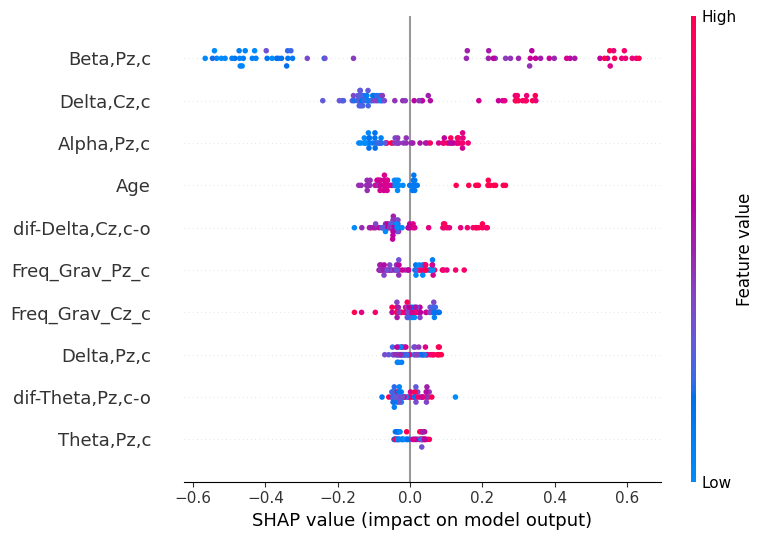

<Figure size 640x480 with 0 Axes>

test_sbj
[23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6742826	test: 0.6774577	best: 0.6774577 (0)	total: 2.2ms	remaining: 2.2s
100:	learn: 0.1804830	test: 0.3354747	best: 0.3251541 (92)	total: 117ms	remaining: 1.04s
200:	learn: 0.1031468	test: 0.2529644	best: 0.2516929 (179)	total: 229ms	remaining: 909ms
300:	learn: 0.0718864	test: 0.2275272	best: 0.2272644 (299)	total: 360ms	remaining: 835ms
400:	learn: 0.0543500	test: 0.2099669	best: 0.2071454 (384)	total: 479ms	remaining: 715ms
500:	learn: 0.0439279	test: 0.1917845	best: 0.1900956 (494)	total: 604ms	remaining: 601ms
600:	learn: 0.0362558	test: 0.1802751	best: 0.1801543 (595)	total: 761ms	remaining: 506ms
700:	learn: 0.0306972	test: 0.1704838	best: 0.1698660 (669)	total: 872ms	remaining: 372ms
800:	learn: 0.0267458	test: 0.1599617	best: 0.1593144 (795)	total: 996ms	remaining: 247ms
900:	learn: 0.0236571	test: 0.1591642	best: 0.1581598 (896)	total: 1.11s	remaining: 122ms
999:	learn: 0.0211527	test: 0.1539938	best: 0.1531943 (991)	total: 1.21s	remaining: 0us

bestTest = 0.1531

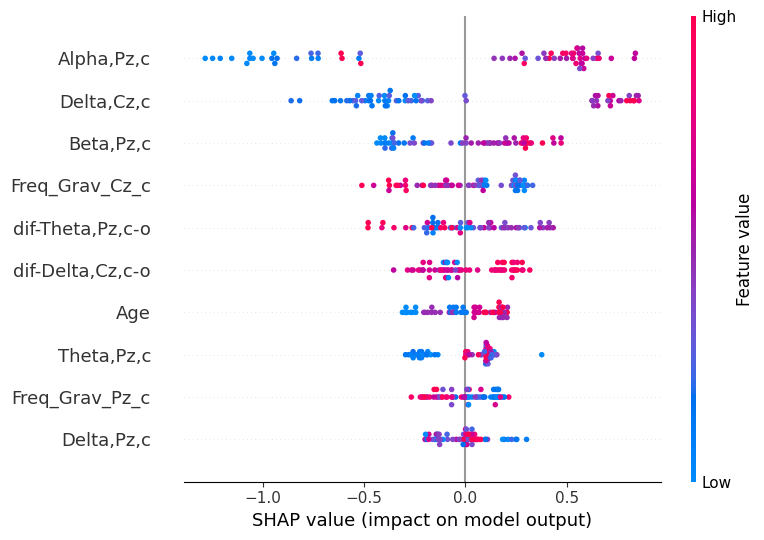

<Figure size 640x480 with 0 Axes>

test_sbj
[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6720179	test: 0.6675083	best: 0.6675083 (0)	total: 2.18ms	remaining: 2.17s
100:	learn: 0.1910902	test: 0.4634886	best: 0.4500562 (62)	total: 114ms	remaining: 1.02s
200:	learn: 0.1099537	test: 0.5118303	best: 0.4500562 (62)	total: 220ms	remaining: 876ms
300:	learn: 0.0774100	test: 0.5319702	best: 0.4500562 (62)	total: 329ms	remaining: 763ms
400:	learn: 0.0576586	test: 0.5524123	best: 0.4500562 (62)	total: 439ms	remaining: 655ms
500:	learn: 0.0469178	test: 0.5703444	best: 0.4500562 (62)	total: 546ms	remaining: 543ms
600:	learn: 0.0391185	test: 0.5938577	best: 0.4500562 (62)	total: 657ms	remaining: 436ms
700:	learn: 0.0338172	test: 0.6099584	best: 0.4500562 (62)	total: 767ms	remaining: 327ms
800:	learn: 0.0295430	test: 0.6255838	best: 0.4500562 (62)	total: 902ms	remaining: 224ms
900:	learn: 0.0262125	test: 0.6318971	best: 0.4500562 (62)	total: 1.01s	remaining: 111ms
999:	learn: 0.0235123	test: 0.6482476	best: 0.4500562 (62)	total: 1.12s	remaining: 0us

bestTest = 0.4500561901


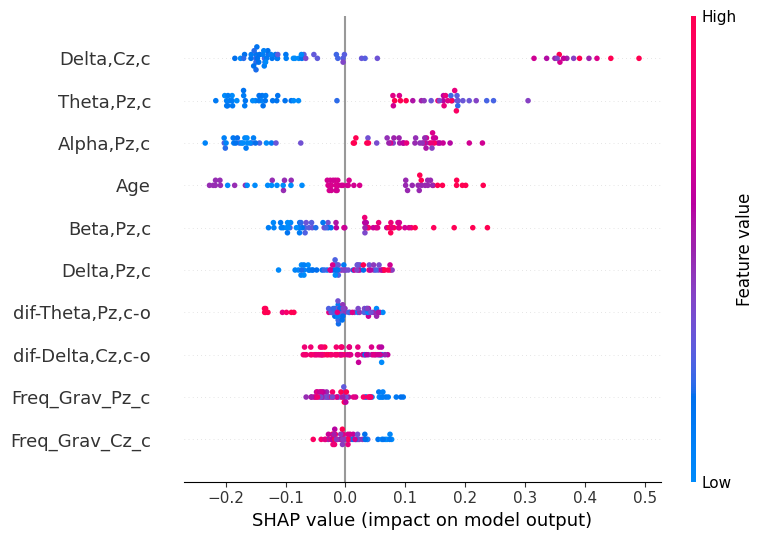

<Figure size 640x480 with 0 Axes>

test_sbj
[16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6654355	test: 0.6578468	best: 0.6578468 (0)	total: 1.44ms	remaining: 1.44s
100:	learn: 0.1767730	test: 0.3515341	best: 0.3396744 (85)	total: 119ms	remaining: 1.06s
200:	learn: 0.0970428	test: 0.4122488	best: 0.3396744 (85)	total: 229ms	remaining: 912ms
300:	learn: 0.0668877	test: 0.4571212	best: 0.3396744 (85)	total: 340ms	remaining: 790ms
400:	learn: 0.0500188	test: 0.4728936	best: 0.3396744 (85)	total: 451ms	remaining: 673ms
500:	learn: 0.0400238	test: 0.4899519	best: 0.3396744 (85)	total: 565ms	remaining: 563ms
600:	learn: 0.0331225	test: 0.5059085	best: 0.3396744 (85)	total: 680ms	remaining: 452ms
700:	learn: 0.0280257	test: 0.5193095	best: 0.3396744 (85)	total: 792ms	remaining: 338ms
800:	learn: 0.0242465	test: 0.5292069	best: 0.3396744 (85)	total: 921ms	remaining: 229ms
900:	learn: 0.0215057	test: 0.5362583	best: 0.3396744 (85)	total: 1.03s	remaining: 113ms
999:	learn: 0.0193128	test: 0.5458973	best: 0.3396744 (85)	total: 1.14s	remaining: 0us

bestTest = 0.339674423
b

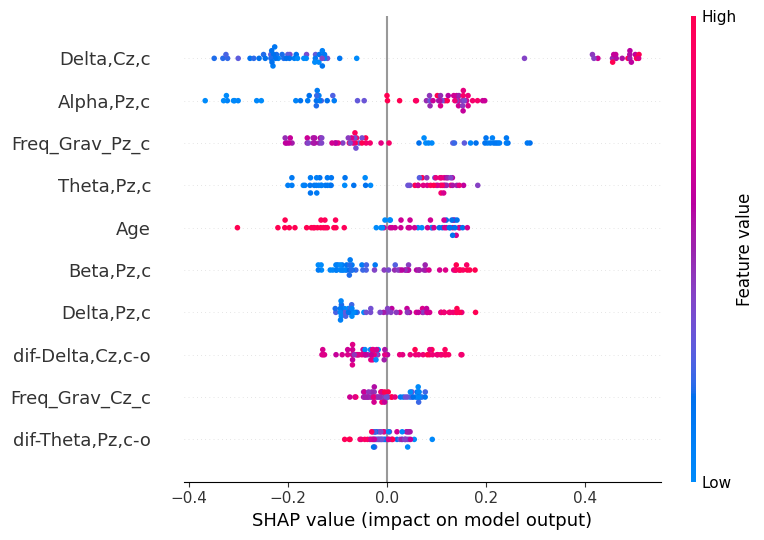

<Figure size 640x480 with 0 Axes>

test_sbj
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6683489	test: 0.6586370	best: 0.6586370 (0)	total: 1.86ms	remaining: 1.86s
100:	learn: 0.1413502	test: 0.1427212	best: 0.1427212 (100)	total: 117ms	remaining: 1.04s
200:	learn: 0.0845293	test: 0.1003849	best: 0.1002375 (199)	total: 232ms	remaining: 921ms
300:	learn: 0.0580667	test: 0.0773212	best: 0.0772977 (299)	total: 342ms	remaining: 794ms
400:	learn: 0.0439156	test: 0.0625411	best: 0.0625411 (400)	total: 457ms	remaining: 683ms
500:	learn: 0.0348053	test: 0.0549941	best: 0.0549848 (499)	total: 565ms	remaining: 563ms
600:	learn: 0.0289088	test: 0.0486231	best: 0.0486231 (600)	total: 677ms	remaining: 450ms
700:	learn: 0.0246763	test: 0.0434072	best: 0.0434072 (700)	total: 789ms	remaining: 336ms
800:	learn: 0.0213772	test: 0.0402516	best: 0.0402516 (800)	total: 921ms	remaining: 229ms
900:	learn: 0.0189460	test: 0.0377838	best: 0.0377838 (900)	total: 1.03s	remaining: 114ms
999:	learn: 0.0170067	test: 0.0353906	best: 0.0353906 (999)	total: 1.14s	remaining: 0us

bestTest = 0.0

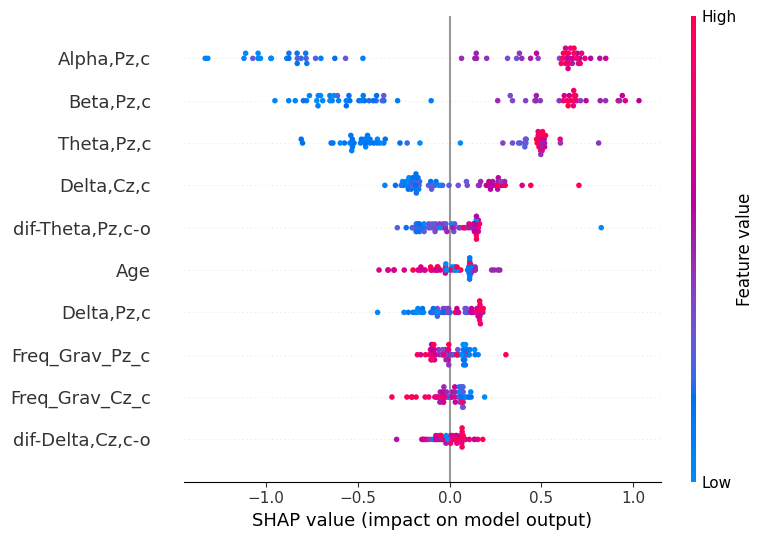

<Figure size 640x480 with 0 Axes>

test_sbj
[17. 17. 17. 17. 17. 17. 17. 17. 17. 17.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6759808	test: 0.6697992	best: 0.6697992 (0)	total: 1.53ms	remaining: 1.53s
100:	learn: 0.1860283	test: 0.2610634	best: 0.2610634 (100)	total: 114ms	remaining: 1.02s
200:	learn: 0.0996207	test: 0.1910059	best: 0.1901801 (197)	total: 228ms	remaining: 907ms
300:	learn: 0.0701892	test: 0.1749420	best: 0.1749420 (300)	total: 341ms	remaining: 791ms
400:	learn: 0.0535548	test: 0.1590843	best: 0.1590843 (400)	total: 453ms	remaining: 677ms
500:	learn: 0.0422952	test: 0.1547510	best: 0.1545137 (468)	total: 566ms	remaining: 564ms
600:	learn: 0.0349296	test: 0.1484222	best: 0.1483394 (599)	total: 674ms	remaining: 447ms
700:	learn: 0.0299710	test: 0.1400496	best: 0.1398053 (699)	total: 786ms	remaining: 335ms
800:	learn: 0.0260154	test: 0.1313843	best: 0.1313744 (799)	total: 924ms	remaining: 230ms
900:	learn: 0.0231427	test: 0.1235148	best: 0.1235148 (900)	total: 1.04s	remaining: 114ms
999:	learn: 0.0208394	test: 0.1183448	best: 0.1181571 (995)	total: 1.16s	remaining: 0us

bestTest = 0.1

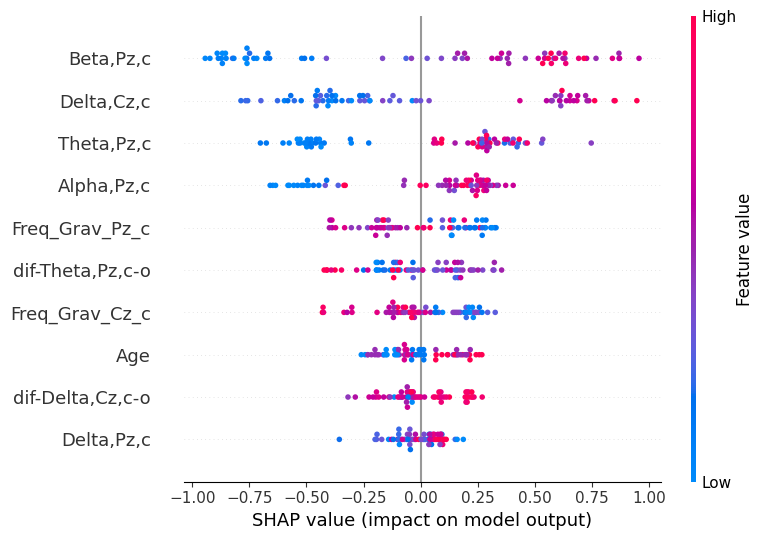

<Figure size 640x480 with 0 Axes>

test_sbj
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6778918	test: 0.6785844	best: 0.6785844 (0)	total: 2.15ms	remaining: 2.14s
100:	learn: 0.1587134	test: 0.7857821	best: 0.5947294 (20)	total: 123ms	remaining: 1.09s
200:	learn: 0.0860120	test: 0.9367042	best: 0.5947294 (20)	total: 238ms	remaining: 947ms
300:	learn: 0.0585032	test: 1.0487014	best: 0.5947294 (20)	total: 349ms	remaining: 812ms
400:	learn: 0.0447069	test: 1.1172074	best: 0.5947294 (20)	total: 463ms	remaining: 692ms
500:	learn: 0.0359120	test: 1.1623193	best: 0.5947294 (20)	total: 572ms	remaining: 570ms
600:	learn: 0.0302172	test: 1.2105473	best: 0.5947294 (20)	total: 687ms	remaining: 456ms
700:	learn: 0.0256902	test: 1.2551335	best: 0.5947294 (20)	total: 801ms	remaining: 342ms
800:	learn: 0.0223999	test: 1.2890314	best: 0.5947294 (20)	total: 940ms	remaining: 233ms
900:	learn: 0.0198737	test: 1.3213367	best: 0.5947294 (20)	total: 1.05s	remaining: 115ms
999:	learn: 0.0177834	test: 1.3498554	best: 0.5947294 (20)	total: 1.16s	remaining: 0us

bestTest = 0.5947294442


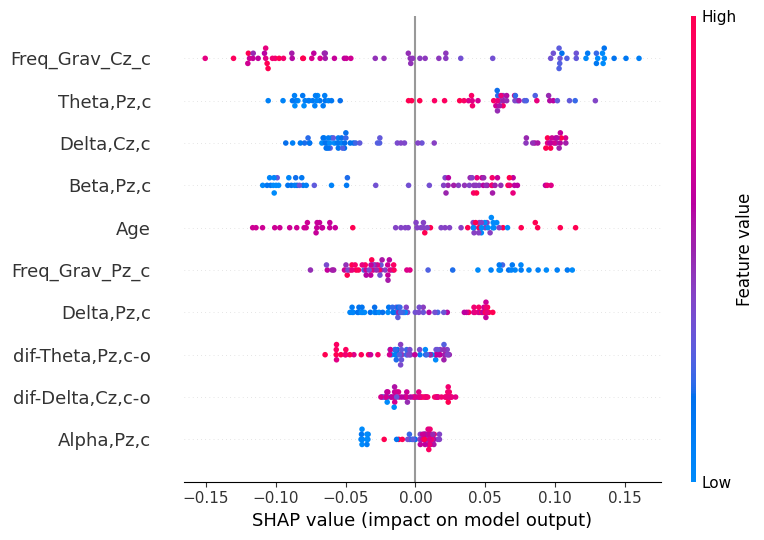

<Figure size 640x480 with 0 Axes>

Average Accuracy across all folds: 0.4833333333333333
Age: 79.26231038315387
Delta,Pz,c: 35.03971685299617
Beta,Pz,c: 105.64017696764436
Delta,Cz,c: 121.04718880957945
Theta,Pz,c: 87.94603135431764
Freq_Grav_Cz_c: 47.305323601995
Alpha,Pz,c: 85.45848818155196
Freq_Grav_Pz_c: 56.74089294595179
dif-Delta,Cz,c-o: 36.46390549278515
dif-Theta,Pz,c-o: 45.095965410024604


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6778918	test: 0.6785844	best: 0.6785844 (0)	total: 2.41ms	remaining: 2.41s
100:	learn: 0.1587134	test: 0.7857821	best: 0.5947294 (20)	total: 117ms	remaining: 1.04s
200:	learn: 0.0860120	test: 0.9367042	best: 0.5947294 (20)	total: 230ms	remaining: 915ms
300:	learn: 0.0585032	test: 1.0487014	best: 0.5947294 (20)	total: 346ms	remaining: 804ms
400:	learn: 0.0447069	test: 1.1172074	best: 0.5947294 (20)	total: 460ms	remaining: 687ms
500:	learn: 0.0359120	test: 1.1623193	best: 0.5947294 (20)	total: 572ms	remaining: 570ms
600:	learn: 0.0302172	test: 1.2105473	best: 0.5947294 (20)	total: 684ms	remaining: 454ms
700:	learn: 0.0256902	test: 1.2551335	best: 0.5947294 (20)	total: 800ms	remaining: 341ms
800:	learn: 0.0223999	test: 1.2890314	best: 0.5947294 (20)	total: 933ms	remaining: 232ms
900:	learn: 0.0198737	test: 1.3213367	best: 0.5947294 (20)	total: 1.05s	remaining: 116ms
999:	learn: 0.0177834	test: 1.3498554	best: 0.5947294 (20)	total: 1.16s	remaining: 0us

bestTest = 0.5947294442


In [122]:
#Final Cat-boost

from xgboost import XGBRegressor  # Assuming driving performance is continuous
from catboost import CatBoostClassifier,Pool
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import shap
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.utils import to_categorical


cm = np.zeros((2,2))


m = power_mind_g_oc[:,:].shape[0]#input_data.shape[0]
n = 1#input_data.shape[1]
p = power_mind_g_oc.shape[1]

acc = []
ytests = []
preds = []

# Initialize the XGBoost regressor (for regression tasks)
#xgb_model = XGBRegressor(n_estimators=20, learning_rate=0.1, max_depth=5, random_state=42)
model = CatBoostClassifier(
    iterations=1000,       # Number of boosting iterations
    learning_rate = 0.15,     # Learning rate
    l2_leaf_reg = 15,
    depth = 5,               # Depth of the tree
    loss_function='MultiClass',  # Multi-class classification
    verbose=100,     # Output every 100 iterations
    random_seed=42,
    #auto_class_weights='Balanced'
   # bagging_temperature=0.80,
    #border_count= 227, 
    #random_strength= 2.3
)

group_kfold = GroupKFold(n_splits=np.unique(sbj_ids[:]).shape[0]) # We have sleep parameters of 16 subjects

# List to store the root mean squared error for each fold
II = [43,10,4,9,7,36,1,37,33,31]#  [43,10,4,9,7,36,1,37,33,31]#[43,30,1,4,15,33,0,25,35]#[43,0,6,40,21,24,15,28,27,5]# [43,10,3,4,9,7,36,1,37,33,31,28]# [43,10,38,1,7,36,40,9,25,37,18,3,4] #  [43,10,4,9,7,36,1,37,33,31]# [43,10,3,4,5,9,7,1,33,37]#[6,7,9,37,0,1,4,43]# [9,10,7,11,4,28,12,0,43]#
data = power_mind_g_oc[:,II]#input_data[:,:]#.reshape(m*n,p)
re_targets = targets #np.repeat(targets,input_data.shape[1])
re_sbj_ids = sbj_ids#np.repeat(sbj_ids,input_data.shape[1])
n_match = 0; n_total = 0
i = 1
preds = []
all_test_blocks = []
y_tests = []
feature_names =['Alpha,Cz,c','Alpha,Pz,c','Alpha,Fz,c','Beta,Cz,c','Beta,Pz,c','Beta,Fz,c','Theta,Cz,c','Theta,Pz,c','Theta,Fz,c','Delta,Cz,c','Delta,Pz,c','Delta,Fz,c','Alpha,Cz,o','Alpha,Pz,o','Alpha,Fz,o','Beta,Cz,o','Beta,Pz,o','Beta,Fz,o','Theta,Cz,o','Theta,Pz,o','Theta,Fz,o','Delta,Cz,o','Delta,Pz,o','Delta,Fz,o','dif_Alpha,Cz,c-o','dif_Alpha,Pz,c-o','dif_Alpha,Fz,c-o','dif_Beta,Cz,c-o','dif_Beta,Pz,c-o','dif_Beta,Fz,c-o','dif_Theta,Cz,c-o','dif-Theta,Pz,c-o','dif-Theta,Fz,c-o','dif-Delta,Cz,c-o','dif-Delta,Pz,c-o','dif-Delta,Fz,c-o','Freq_Grav_Cz_c','Freq_Grav_Pz_c','Freq_Grav_Fz_c','Freq_Grav_Cz_o','Freq_Grav_Pz_o','Freq_Grav_Fz_o','dif-Freq_Grav_Cz_c-o','Age','dif-Freq_Grav_Fz_c-o','Time']
feature_names = [feature_names[i] for i in II]
# Perform cross-validation manually
for train_index, test_index in group_kfold.split(data, re_targets, re_sbj_ids):
    print('test_sbj')
    print(sbj_ids[test_index])
    X_train, X_test =  data[train_index,:], data[test_index,:]
    y_train, y_test =  re_targets[train_index],  re_targets[test_index]
    test_blocks = sbj_blocks[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    train_sbjs = re_sbj_ids[train_index]
    test_blocks = sbj_blocks[test_index]
    
   # np.random.seed(42)
    
    rows_with_1_in_first = np.where(y_train == 0)[0]
    rows_with_1_in_mid = np.where(y_train == 1)[0]
    # Find rows where the second column is 1
    rows_with_1_in_second = np.where(y_train == 1)[0]
    rows_with_similarity = np.where(X_train[:,-1] ==  X_test[0,-1])[0]
    
    # Randomly select 5 indices from each group
    random_rows_with_1_in_first_5 = np.random.choice(rows_with_1_in_first,2, replace=False)
    random_rows_with_1_in_second_5 = np.random.choice(rows_with_1_in_second,2, replace=False)
    #random_rows_with_1_in_mid_5 = np.random.choice(rows_with_1_in_mid, 3, replace=False)
    
    #random_rows_with_similarity = np.random.choice(rows_with_similarity,,39
    X_val = np.concatenate(( X_train[ random_rows_with_1_in_first_5,:],X_train[random_rows_with_1_in_second_5,:]),axis=0)
    y_val = np.concatenate(( y_train[ random_rows_with_1_in_first_5],y_train[random_rows_with_1_in_second_5]),axis=0)
    X_train = np.delete(X_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5 ], axis=0)
    y_train = np.delete(y_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5], axis=0)

    if not (0 in y_train and 1 in y_train):
        print("Skipping this fold because one of the classes is missing in y_train")
        continue  # Move to 

    #X_val = np.concatenate(( X_train[ random_rows_with_1_in_first_5,:],X_train[random_rows_with_1_in_second_5,:],X_train[random_rows_with_1_in_mid_5,:]),axis=0)
    #y_val = np.concatenate(( y_train[ random_rows_with_1_in_first_5],y_train[random_rows_with_1_in_second_5],y_train[random_rows_with_1_in_mid_5 ]),axis=0)
    #X_train = np.delete(X_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5,random_rows_with_1_in_mid_5 ], axis=0)
    #y_train = np.delete(y_train, [  random_rows_with_1_in_first_5,random_rows_with_1_in_second_5,random_rows_with_1_in_mid_5 ], axis=0)
    
    #X_val = np.concatenate((X_train[ random_rows_with_similarity ,:],X_train[ random_rows_with_1_in_first_5,:],X_train[random_rows_with_1_in_second_5,:]),axis=0)
    #y_val = np.concatenate((y_train[ random_rows_with_similarity ],y_train[ random_rows_with_1_in_first_5],y_train[random_rows_with_1_in_second_5 ]),axis=0)
    #X_train = np.delete(X_train, [ random_rows_with_similarity, random_rows_with_1_in_first_5,random_rows_with_1_in_second_5 ], axis=0)
    #y_train = np.delete(y_train,[ random_rows_with_similarity, random_rows_with_1_in_first_5,random_rows_with_1_in_second_5 ], axis=0)

    train_pool = Pool(
        data=X_train,       # Training data
        label=y_train,      # Labels
        feature_names=feature_names  # Assign feature names
    )
    val_pool = Pool(
        data=X_val,
        label=y_val,
        feature_names=feature_names  # Optional: Consistent feature names for validation
    )
    
   # Train the XGBoost model on the training set
    #xgb_model.fit(X_train, y_train)
    model.fit(
        train_pool,
        eval_set=val_pool,  # Use Pool object for validation
        plot=True  # Enable training visualization
    )

    model.plot_tree(
        tree_idx=0,
        pool=train_pool,  # Provide the Pool object with feature names
    )
    #plt.show()
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    preds.append(y_pred)
    y_tests.append(y_test)
    print(y_pred)
    print(y_test)
    n_match += np.sum(y_test==y_pred.T)
    n_total += (y_pred).shape[0]
    print('-------------------------')
    print((y_test==y_pred.T).shape)
    print(y_pred.shape)
    print(y_test.shape)
    print('--------------------------')
    #print(confusion_matrix(y_test, y_pred))
    #cm += confusion_matrix(y_test, y_pred)
    accuracy =  accuracy_score(y_test, y_pred)
    
    # Calculate the Root Mean Squared Error for this fold
    acc.append(accuracy)
    #precisions.append(precision_0)
    #recalls.append( recall_0) 
    all_test_blocks.append(test_blocks)
    
    print(f"Subject {i}, Fold Accuracy: {accuracy}")
    #print('Subject',str(i),'ytest:',y_test,'y_pred:',y_pred)
   
    #res_plot[test_index,0], res_plot[test_index,1]= y_test,y_pred
   # feature_names = ['Theta,Fz','Beta,Cz']#['Delta,Cz', 'Delta,Fz', 'Beta,Pz', 'Theta,Cz', 'Beta,Cz', 'Feature6']  # Adjust names as needed
    class_mapping = {0: "High Per", 1: "Low per"}
  
    
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)

    # Plot the SHAP summary plot
    #shap.summary_plot(shap_values, X_train)
    fig, ax = plt.subplots()
    fig.set_layout_engine("tight")
    shap.summary_plot(
        shap_values[:, :,0],  # SHAP values for the class
        features=X_train,  # The corresponding feature values
        feature_names=feature_names,  # Names of features
        class_names=[class_mapping[0], class_mapping[1]]  # Class labels'
    )
    plt.show()

    # Adjust layout to avoid overlap
    plt.tight_layout()  # This will automatically adjust the layout to avoid overlaps

    # Show the plot
    plt.show()
    if i==1:
        feature_importances = np.zeros(model.get_feature_importance().shape)
    feature_importances += model.get_feature_importance()
    i +=1

# Calculate the average MSE across all folds
average_acc = np.mean(acc)
print(f"Average Accuracy across all folds: {average_acc}")

for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

train_pool = Pool(
    data=X_train,       # Training data
    label=y_train,      # Labels
    feature_names=feature_names  # Assign feature names
)
val_pool = Pool(
    data=X_val,
    label=y_val,
    feature_names=feature_names  # Optional: Consistent feature names for validation
)

# Train the XGBoost model on the training set
#xgb_model.fit(X_train, y_train)
model.fit(
    train_pool,
    eval_set=val_pool,  # Use Pool object for validation
    plot=True  # Enable training visualization
)

model.plot_tree(
    tree_idx=1,
    pool=train_pool,  # Provide the Pool object with feature names
)

y_tests_flat = np.concatenate(y_tests)
preds_flat = np.concatenate([arr.flatten() for arr in preds])
report = classification_report(y_tests_flat, preds_flat)
falt_blocks = np.concatenate(all_test_blocks)
# Print the classification report
print(report)
print(np.sum(preds_flat==y_tests_flat)/len(y_tests_flat))
    